# Task 02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("./train (1).csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, "Cabin" column has a lot of null values.So,its better that we drop the "Cabin" column.

In [5]:
df.drop(columns="Cabin",axis=1,inplace=True)

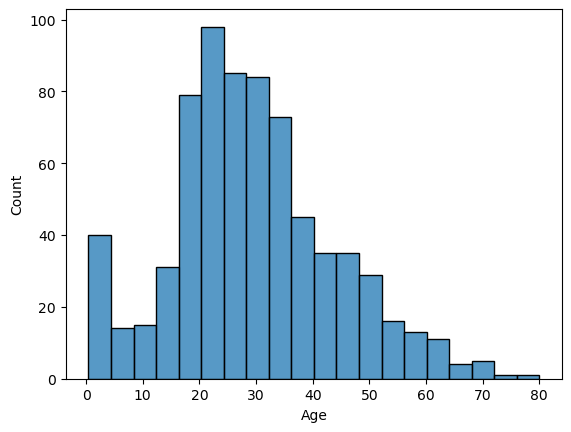

In [6]:
sns.histplot(x="Age",data=df)
plt.show()

Here,for "Age" column it is suitable to use mean to fill the null values as from graph we can see the data is  approximately symmetrically distributed without significant outliers.

In [7]:
# Calculate the mean of the "Age" column
age_mean = df["Age"].mean()
# Fill missing values in the "Age" column with the calculated mean value
df["Age"].fillna(age_mean, inplace=True)
# Check the count of missing values in the DataFrame after filling operations
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
#Changing datatype of "Age" to int
df["Age"]=df["Age"].astype('int')

Since the "Embarked" column have missing values in categorical data, filling them with the mode can be a reasonable approach.

In [9]:
# Calculate the mode (most frequent value) of the "Embarked" column
embarked_mode = df["Embarked"].mode()[0]
# Print the calculated mode value
print(embarked_mode)
# Fill missing values in the "Embarked" column with the calculated mode value
df["Embarked"].fillna(embarked_mode, inplace=True)
# Check the count of missing values in the DataFrame after filling operations
df.isna().sum()


S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [11]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


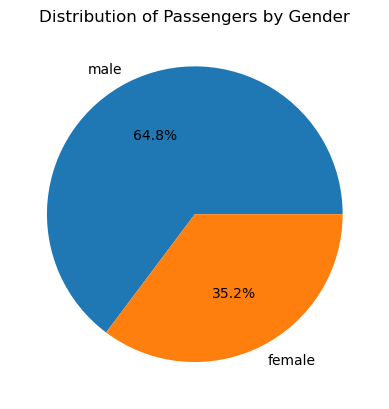

In [12]:
# Count the number of passengers for each gender category
gender_count = df['Sex'].value_counts()
# Plotting a pie chart to display the distribution of passengers by gender
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
# Adding a title to the pie chart
plt.title("Distribution of Passengers by Gender")
# Display the pie chart
plt.show()


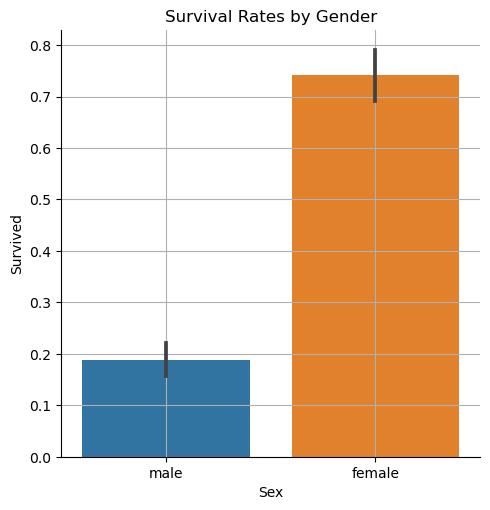

In [13]:
# Plotting survival rates by gender using a bar plot
sns.catplot(y="Survived", x="Sex", data=df, kind="bar")
# Adding a title to the plot
plt.title("Survival Rates by Gender")
# Adding a grid to the plot
plt.grid()
# Display the plot
plt.show()

This visualization allows for a quick comparison of survival rates based on gender. In the dataset, female passengers exhibited a significantly higher survival rate of around 74%, while male passengers had a notably lower survival rate of approximately 19%. This reveals a substantial disparity, indicating that females were much more likely to survive compared to males during the event or situation represented in the data.



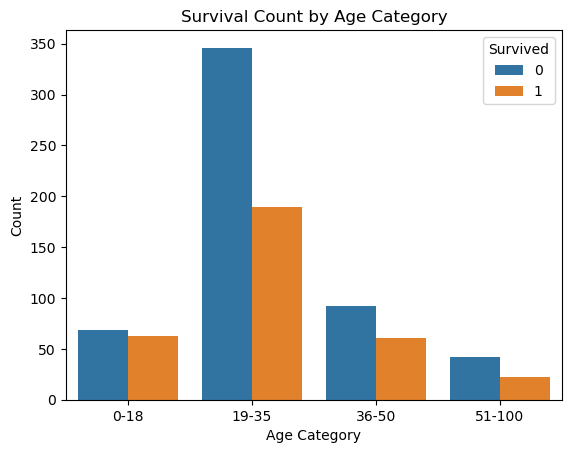

In [14]:
# Define bins based on age ranges
bins = [0, 18, 35, 50, 100]
# Labels for each category
labels = ['0-18', '19-35', '36-50', '51-100']
# Create 'Age_Category' column based on age bins
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)
# Plotting 'Survived' against 'Age_Category'
sns.countplot(x='Age_Category', hue='Survived', data=df, order=labels)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Survival Count by Age Category')
plt.legend(title='Survived', loc='upper right')
plt.show()

The code categorizes passenger ages into groups ('Age_Category') and creates a plot showing survival counts in each age range. It visualizes how survival varies across different age categories, indicating potential age-related patterns in survival rates.

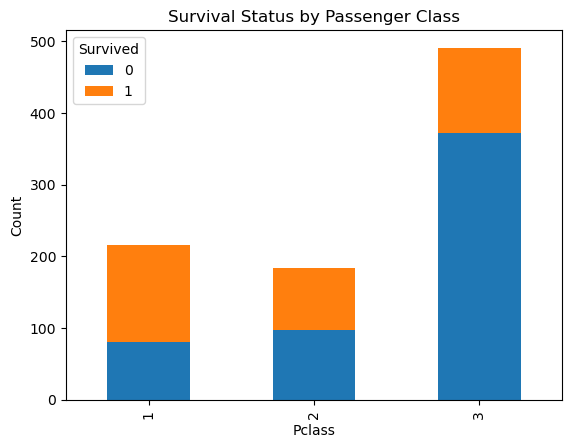

In [15]:
# Grouping data by 'Pclass' and 'Survived', then unstacking to reshape the data
class_survival = df.groupby(['Pclass', 'Survived']).size().unstack()
# Plotting a stacked bar chart for survival status by passenger class
class_survival.plot(kind='bar', stacked=True)
# Labeling the y-axis
plt.ylabel('Count')
# Adding a title to the plot
plt.title('Survival Status by Passenger Class')
# Displaying the plot
plt.show()


This visualization displays the survival rates across different passenger classes (Pclass).Passengers in Class 1 exhibited the highest survival rate among the different classes

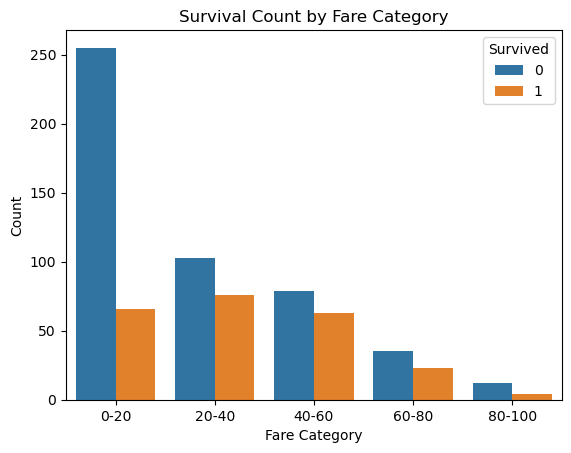

In [16]:
bins = [0, 10, 20, 30, 40,50]  # Define bins based on Fare ranges
labels = ['0-20', '20-40', '40-60', '60-80','80-100']  # Labels for each category

# Create 'Fare_Category' column based on Fare bins
df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels)

# Plotting 'Survived' against 'Fare_Category'
sns.countplot(x='Fare_Category', hue='Survived', data=df, order=labels)
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.title('Survival Count by Fare Category')
plt.legend(title='Survived', loc='upper right')
plt.show()

This code categorizes passenger fares into specific price ranges ('Fare_Category') and creates a count plot using Seaborn to display the survival counts within each fare category.


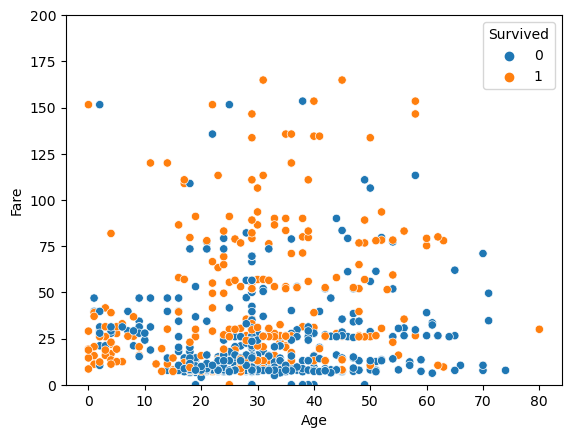

In [17]:
# Creating a scatter plot to visualize the relationship between 'Age' and 'Fare', with points colored by 'Survived'
sns.scatterplot(x="Age", y="Fare", data=df, hue="Survived")
# Setting the y-axis limit to display fares up to 200 for better visualization
plt.ylim(0, 200)
# Displaying the scatter plot
plt.show()


This scatter plot visualizes the relationship between passenger age and fare paid, while using color to denote survival outcomes.
Passengers with younger ages generally tend to pay lower fares, and interestingly, they exhibit a slightly higher survival rate compared to those paying higher fares.

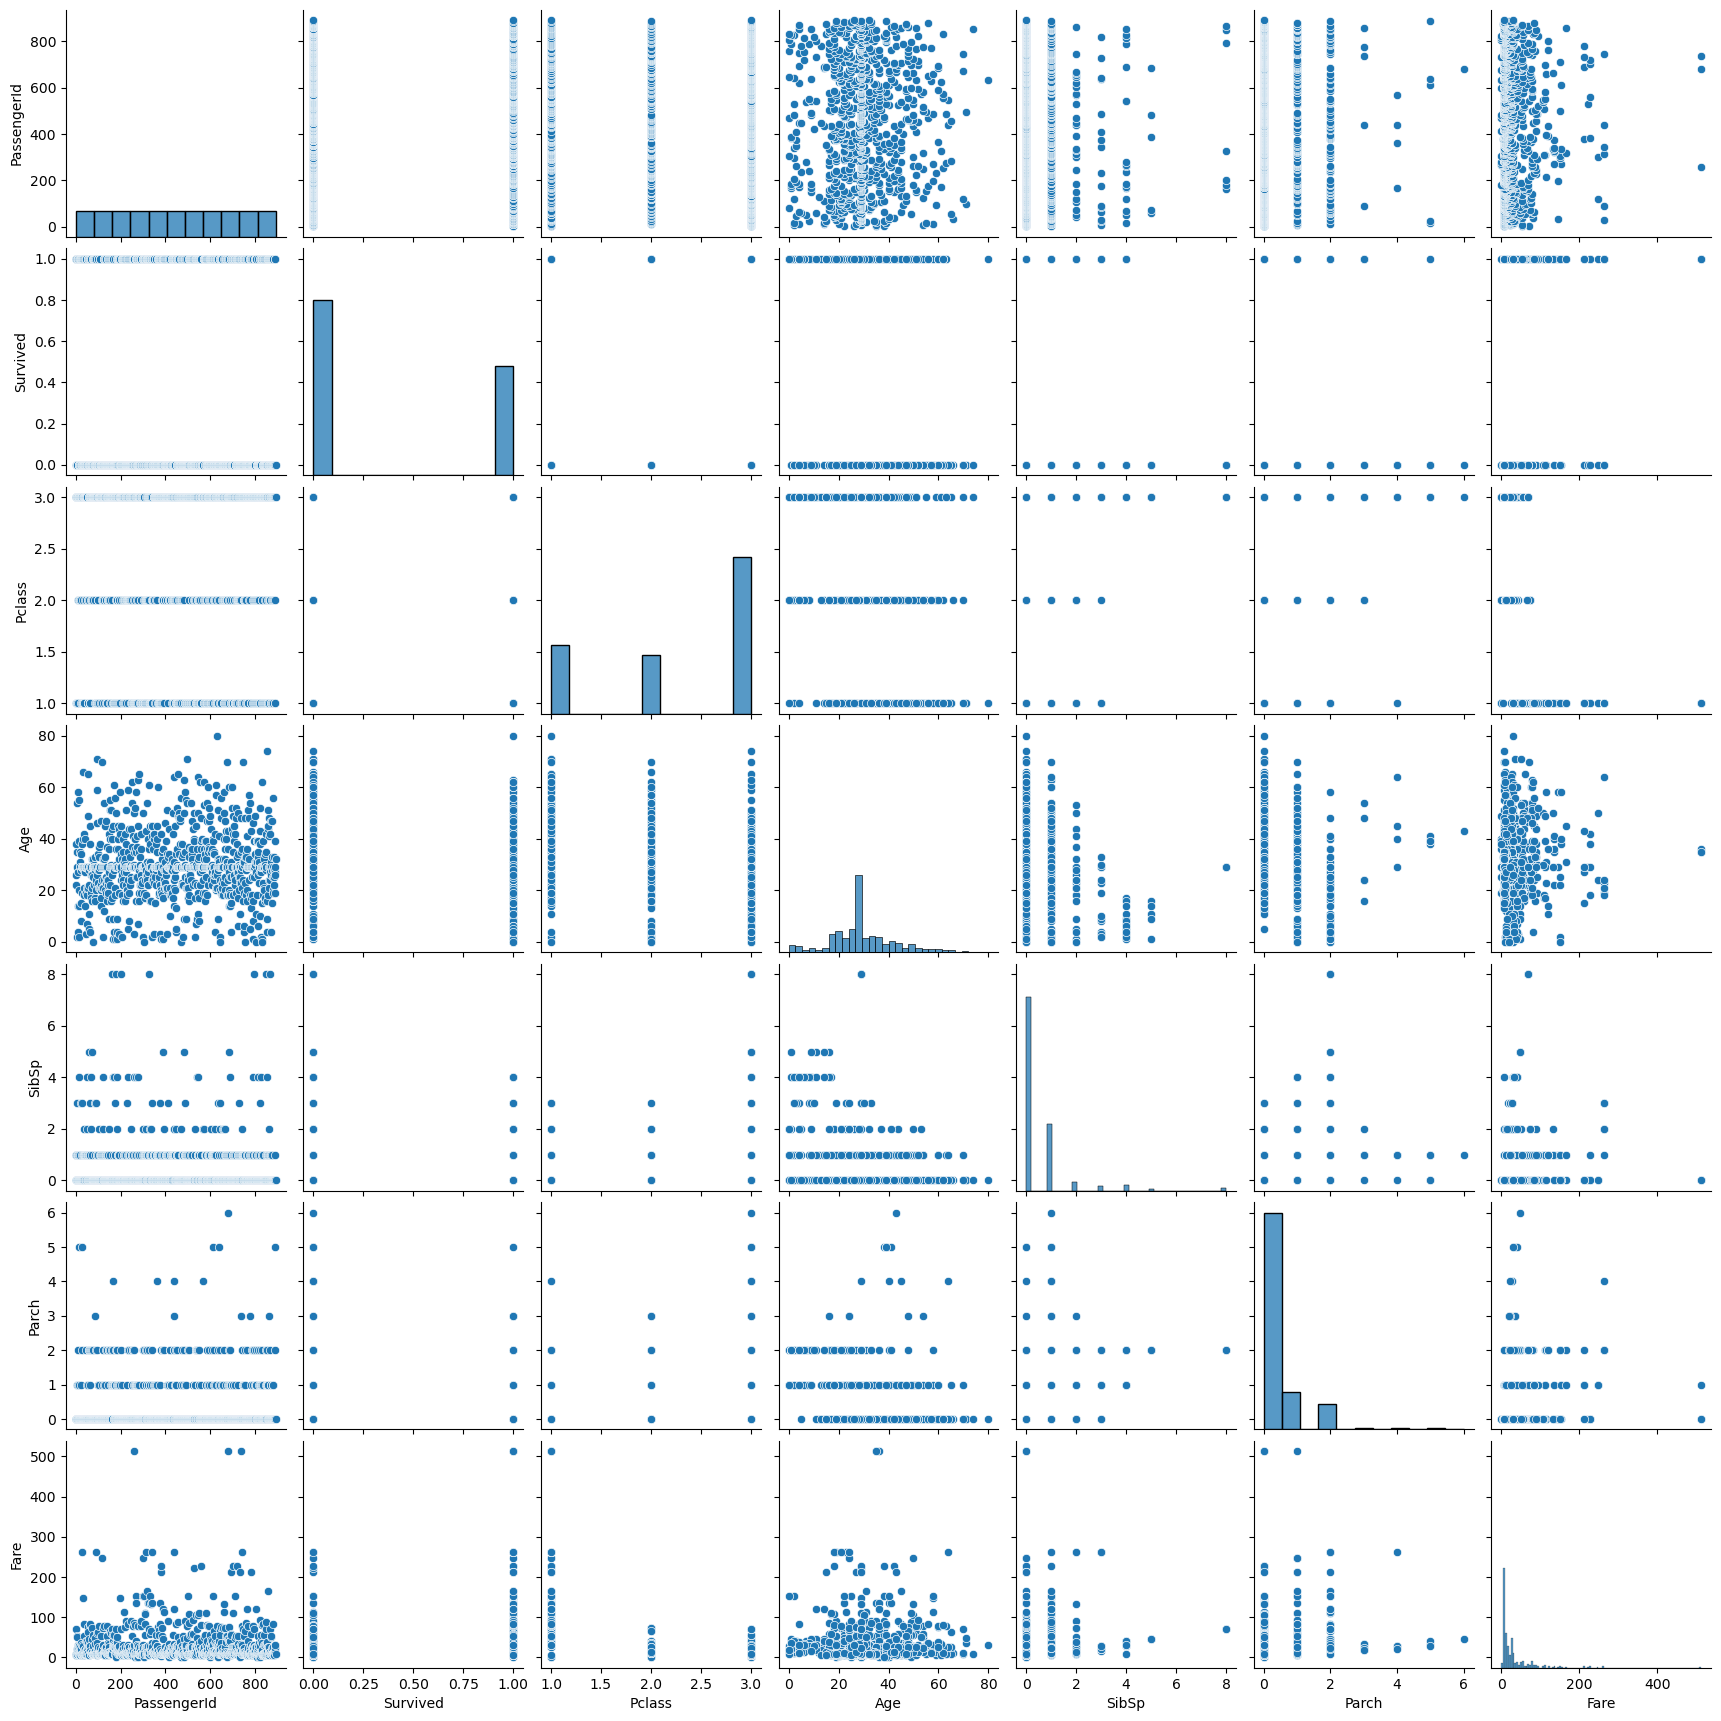

In [18]:
sns.pairplot(df)
plt.show()